# Likelihood curves for multiple sources

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import sys
import json 
import pandas as pd 
import numpy as np 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [39]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import bilby_priors_dict
import logging 
import numpy as np 
import bilby

In [40]:



h = 1 #doesnt matter
measurement_model = 'pulsar' 
seed = 1237
num_gw_sources = 2 


#Setup the system
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,num_gw_sources=num_gw_sources) # define the system parameters as a dict. Todo: make this a class
PTA = Pulsars(P)                                       # setup the PTA
data = SyntheticData(PTA,P)                            # generate some synthetic data

#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:Running for two deterministic GW sources
INFO:root:You are assigning the σp terms randomly


INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Pulsar terms measurement model


In [41]:

init_parameters_optimal, priors_optimal = bilby_priors_dict(PTA,P,set_parameters_as_known=True)
optimal_parameters = priors_optimal.sample(1)
model_likelihood = KF.likelihood(optimal_parameters)


suboptimal_parameters = optimal_parameters.copy()
suboptimal_parameters['phi0_gw_0'] = np.array(0.20)
suboptimal_parameters['phi0_gw_1'] = np.array(1.45)


new_model_likelihood = KF.likelihood(suboptimal_parameters)


INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters


In [42]:
print(new_model_likelihood,model_likelihood,new_model_likelihood-model_likelihood)

586617.2923892528 586621.5036995086 -4.211310255806893


Hmmmm, the suboptimal params have a better likelihood than the optimal params. Lets check the other parameter pairs:

# Offset calculations

In [27]:
import matplotlib.pyplot as plt 

def generate_likelihood_surface(xx,yy,parameter):


    likelihood_surface= np.zeros((len(xx), len(yy)))


    for i in range(len(xx)):
        for j in range(len(yy)):
            suboptimal_parameters = optimal_parameters.copy()
            suboptimal_parameters[f'{parameter}_0'] = np.array(xx[i])
            suboptimal_parameters[f'{parameter}_1'] = np.array(yy[j])
            #likelihood_surface[i][j] = KF.likelihood(suboptimal_parameters)
            likelihood_surface[i][j],_,_ = KF.likelihood_with_results(suboptimal_parameters)


    return likelihood_surface





def plot_surface(xx,yy,likelihood_surface,injections):

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)



    #Cast to 2D mesh
    X,Y = np.meshgrid(xx,yy)
    lx = len(xx)
    ly = len(yy)
    z = np.reshape(likelihood_surface, (lx, ly))


    #Extract location of maxima
    xx_idx, yy_idx = np.unravel_index(likelihood_surface.argmax(), likelihood_surface.shape)
    xc = xx[xx_idx]
    yc = yy[yy_idx]
    zc = likelihood_surface[xx_idx,yy_idx]

    print("Maxima:", xc,yc,zc)

    eps = 1e-1
    CS = ax.pcolormesh(X, Y, z,clim=(np.max(likelihood_surface) - eps, np.max(likelihood_surface)),shading='gouraud',cmap='viridis')
    clb = plt.colorbar(CS)


    ax.scatter(yc,xc)
    ax.scatter(injections[1],injections[0],c='r')






Maxima: 2.95 0.0 356629.74144717713


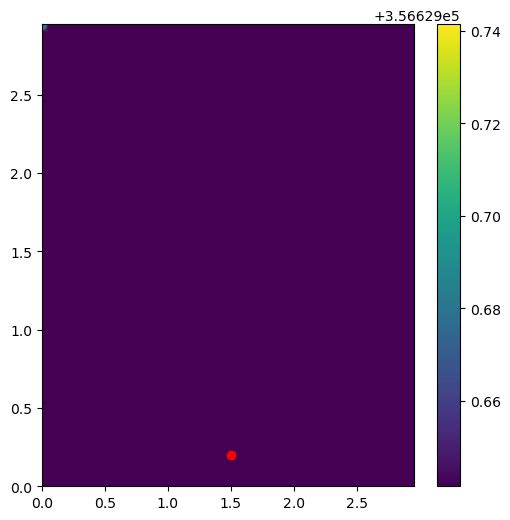

In [44]:
#Phi 0 
xx = np.arange(0,3,0.05)
yy = np.arange(0,3,0.05)
parameter = 'phi0_gw'
injections = P.Φ0

phi0_ll = generate_likelihood_surface(xx,yy,parameter)

plot_surface(xx,yy,phi0_ll,injections)

Maxima: 0.2 1.4500000000000002 585574.0394655444


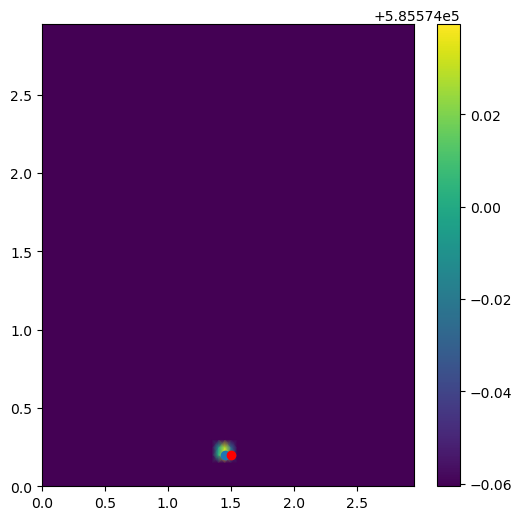

In [23]:
#Phi 0 
xx = np.arange(0,3,0.05)
yy = np.arange(0,3,0.05)
parameter = 'phi0_gw'
injections = P.Φ0

phi0_ll = generate_likelihood_surface(xx,yy,parameter)

plot_surface(xx,yy,phi0_ll,injections)

Maxima: 2.5 0.30000000000000004 586622.0343396686


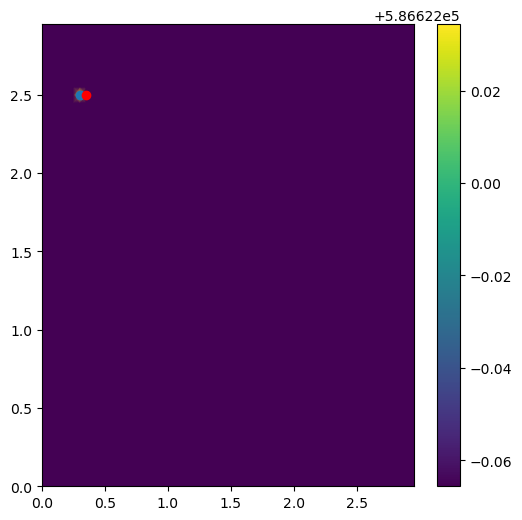

In [29]:
#psi
xx = np.arange(0,3,0.05)
yy = np.arange(0,3,0.05)
parameter = 'psi_gw'
injections = P.ψ

psi_ll = generate_likelihood_surface(xx,yy,parameter)

plot_surface(xx,yy,psi_ll,injections)

Maxima: 2.5 0.30000000000000004 585574.5172988151


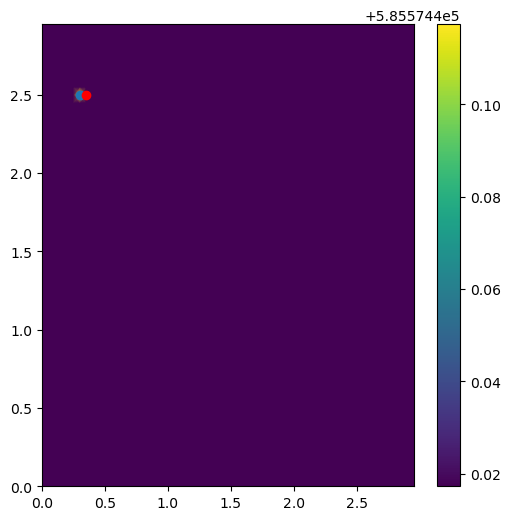

In [30]:
#psi
xx = np.arange(0,3,0.05)
yy = np.arange(0,3,0.05)
parameter = 'psi_gw'
injections = P.ψ

psi_ll = generate_likelihood_surface(xx,yy,parameter)

plot_surface(xx,yy,psi_ll,injections)

In [16]:
#iota
xx = np.arange(0,3,0.1)
yy = np.arange(0,3,0.1)
parameter = 'iota_gw'
injections = P.ι

iota_ll = generate_likelihood_surface(xx,yy,parameter)

plot_surface(xx,yy,iota_ll,injections)

NameError: name 'generate_likelihood_surface' is not defined

Maxima: 1.0 0.7000000000000001 524896.6607609245


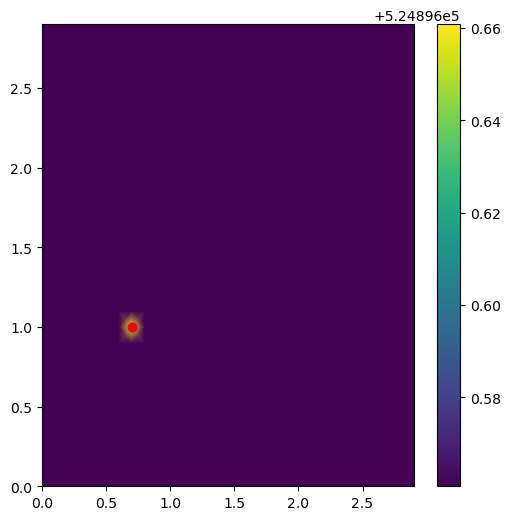

In [97]:
#delta
xx = np.arange(0,3,0.1)
yy = np.arange(0,3,0.1)
parameter = 'delta_gw'
injections = P.δ

delta_ll = generate_likelihood_surface(xx,yy,parameter)

plot_surface(xx,yy,delta_ll,injections)

Maxima: 1.0 1.3 524896.6607609245


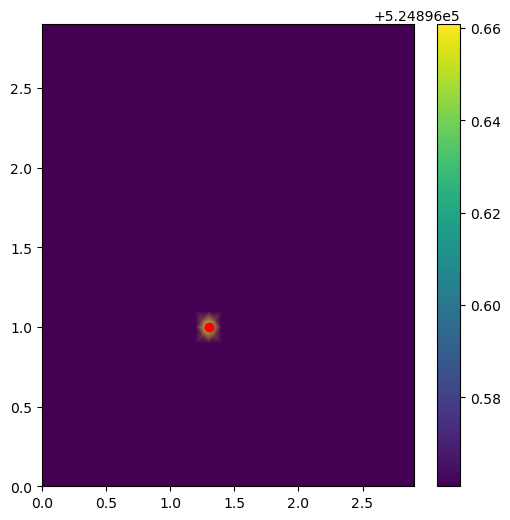

In [98]:
#alpha
xx = np.arange(0,3,0.1)
yy = np.arange(0,3,0.1)
parameter = 'alpha_gw'
injections = P.α
alpha_ll = generate_likelihood_surface(xx,yy,parameter)
plot_surface(xx,yy,alpha_ll,injections)

Maxima: 5.000000000000001e-07 7.000000000000003e-07 524896.6607609243


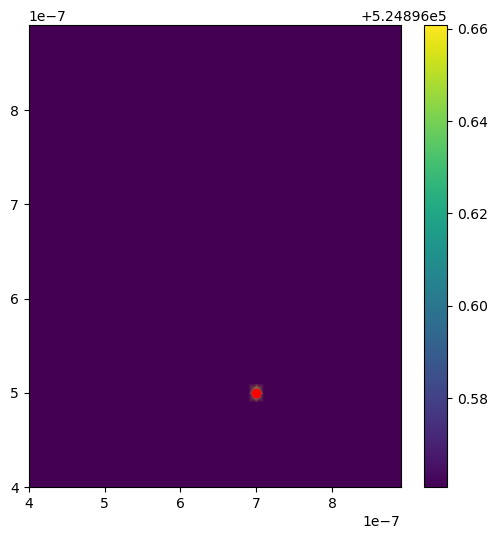

In [99]:
#omega
xx = np.arange(4e-7,9e-7,1e-8)
yy = np.arange(4e-7,9e-7,1e-8)
parameter = 'omega_gw'
injections = P.Ω
omega_ll = generate_likelihood_surface(xx,yy,parameter)
plot_surface(xx,yy,omega_ll,injections)

Maxima: 6.9000000000000025e-15 6.9000000000000025e-15 496664.97431231313


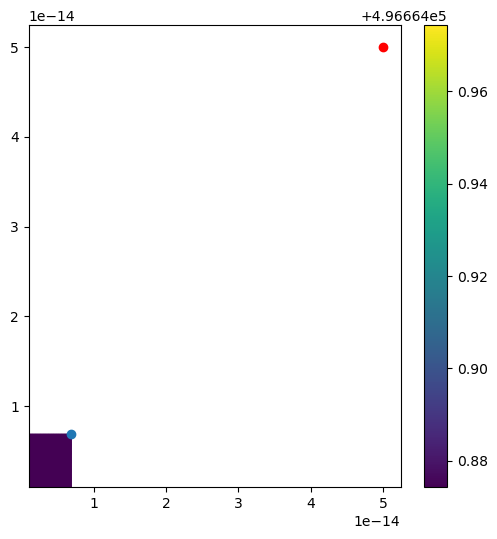

In [100]:
#h
xx = np.arange(1e-15,7e-15,1e-16)
yy = np.arange(1e-15,7e-15,1e-16)
parameter = 'h'
injections = P.h
h_ll = generate_likelihood_surface(xx,yy,parameter)
plot_surface(xx,yy,h_ll,injections)

In [101]:

init_parameters_optimal, priors_optimal = bilby_priors_dict(PTA,P,set_parameters_as_known=True)
optimal_parameters = priors_optimal.sample(1)
model_likelihood = KF.likelihood(optimal_parameters)




suboptimal_parameters = optimal_parameters.copy()
suboptimal_parameters['h_0'] = np.array(5.2000000000000025e-15)
suboptimal_parameters['h_1'] = np.array(4.400000000000002e-15)


new_model_likelihood = KF.likelihood(suboptimal_parameters)


INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters


In [102]:
new_model_likelihood - model_likelihood

-30597.76398299029